# Proof of Concept
Information Theory for AMP-PD Forecasting Solvability

Discretize UPDRS propagation speeds from $s \in \mathbb{R}^{+}$ to labels, and calculate entropy using discrete methods.

For patient $i$, 
H_{i} = 

**TODO: finish writing introduction**

(array([48.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,  0.,  6.]),
 array([0.        , 0.13888889, 0.27777778, 0.41666667, 0.55555556,
        0.69444444, 0.83333333, 0.97222222, 1.11111111, 1.25      ,
        1.38888889]),
 <BarContainer object of 10 artists>)

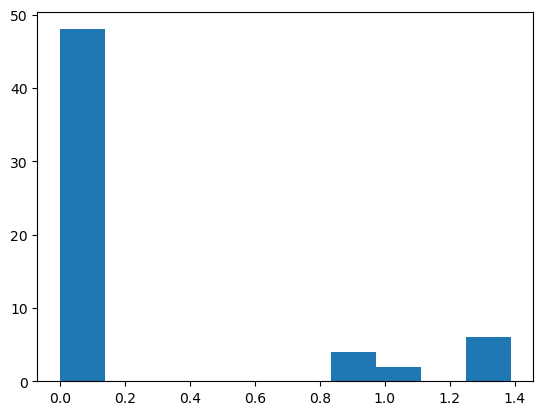

In [ ]:
# library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
# local imports
import scripts.algorithms.infotheory as infotheory
from scripts.algorithms.infotheory import discrete_entropy, discrete_joint_entropy
import scripts.algorithms.simpleinfotheory as simple
from preprocessing.paths import pointwise_features_path

df_pointwise =  pd.read_csv(pointwise_features_path)
all_propagation_speed = df_pointwise['updrs_1_dt']
all_propagation_speed = all_propagation_speed[all_propagation_speed.notna()]
propagation_speed = df_pointwise\
    [df_pointwise['patient_id']==55]['updrs_1_dt']
propagation_speed = propagation_speed[propagation_speed.notna()]
propagation_speed
plt.hist(propagation_speed)

Discretize sample patient's UPDRS-1 scores

(array([1.523e+04, 1.102e+03, 3.930e+02, 1.740e+02, 7.200e+01, 2.400e+01,
        2.100e+01, 9.000e+00, 3.000e+00, 6.000e+00]),
 array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
        1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
        2.33333333]),
 <BarContainer object of 10 artists>)

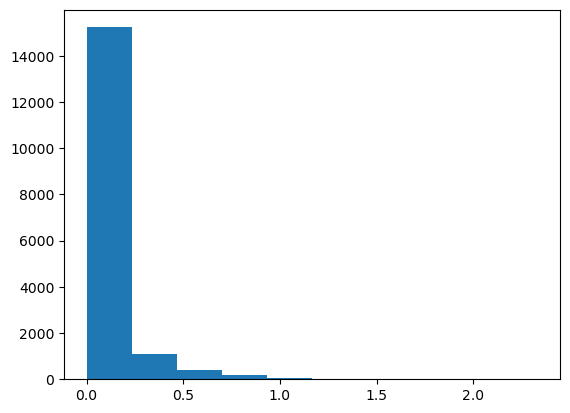

In [2]:
plt.hist(all_propagation_speed)

In [9]:
simple.entropyempirical(propagation_speed)

(1.0787599204576468,
 array([0.        , 0.97222222, 0.97222222, 1.38888889, 1.38888889]),
 array([0.8       , 0.06666667, 0.03333333, 0.01666667, 0.08333333]))

In [10]:
entropy = discrete_entropy(propagation_speed)
k_history = np.row_stack([propagation_speed.shift(n) for n in range(3)])
k_history[np.isnan(k_history)] = 0
entropy_k = discrete_joint_entropy(k_history)
entropy, entropy_k

(0.7477393973662887, -0.0)

poc for kde estimator

In [11]:
propagation_speed.unique()

array([0.        , 0.97222222, 0.97222222, 1.38888889, 1.38888889])

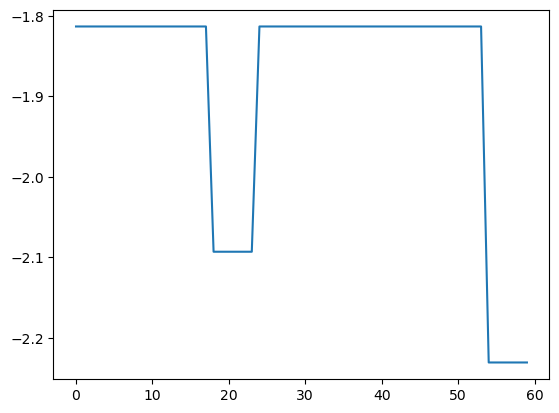

In [11]:

kde = KernelDensity(bandwidth=3,kernel="exponential").fit(
    all_propagation_speed.to_numpy().reshape(-1,1))
kernel_density = kde.score_samples(propagation_speed.to_numpy().reshape(-1,1))
plt.plot(range(len(propagation_speed)), kernel_density)

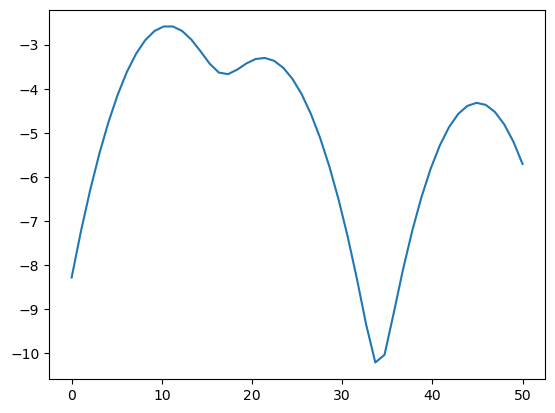

In [12]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot

a = array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [13]:
discrete_entropy(kernel_density)

0.7026832764796582

In [7]:
infotheory.entropy_rate(propagation_speed, k=10, estimator='gaussian')

28.5054718932239

In [ ]:
kernel_history = np.row_stack([propagation_speed.shift(s) for s in range(4)])
kernel_history_1 = kernel_history[1:]
kernel_history[kernel_history.isnan()]


TODO: apply binning, fixed and quantile binning to compare the results.

In [23]:
nbins = 8
discrete_propagation_speed = pd.qcut(propagation_speed, q=nbins, retbins=False, duplicates='drop')

In [24]:
pd.qcut(propagation_speed, q=nbins, retbins=True, duplicates='drop')

(1     (-0.001, 0.972]
 2     (-0.001, 0.972]
 3     (-0.001, 0.972]
 4     (-0.001, 0.972]
 5     (-0.001, 0.972]
 6     (-0.001, 0.972]
 7     (-0.001, 0.972]
 8     (-0.001, 0.972]
 9     (-0.001, 0.972]
 10    (-0.001, 0.972]
 11    (-0.001, 0.972]
 12    (-0.001, 0.972]
 13    (-0.001, 0.972]
 14    (-0.001, 0.972]
 15    (-0.001, 0.972]
 16    (-0.001, 0.972]
 17    (-0.001, 0.972]
 18    (-0.001, 0.972]
 19    (-0.001, 0.972]
 20     (0.972, 1.389]
 21    (-0.001, 0.972]
 22    (-0.001, 0.972]
 23    (-0.001, 0.972]
 24     (0.972, 1.389]
 25    (-0.001, 0.972]
 26    (-0.001, 0.972]
 27    (-0.001, 0.972]
 28    (-0.001, 0.972]
 29    (-0.001, 0.972]
 30    (-0.001, 0.972]
 31    (-0.001, 0.972]
 32    (-0.001, 0.972]
 33    (-0.001, 0.972]
 34    (-0.001, 0.972]
 35    (-0.001, 0.972]
 36    (-0.001, 0.972]
 37    (-0.001, 0.972]
 38    (-0.001, 0.972]
 39    (-0.001, 0.972]
 40    (-0.001, 0.972]
 41    (-0.001, 0.972]
 42    (-0.001, 0.972]
 43    (-0.001, 0.972]
 44    (-0.

In [47]:
# binning algorithm, merge close bins
uniques = propagation_speed.unique()
delta = 0.25
nunique = propagation_speed.value_counts().sort_index()
bin_counts = dict()
last_value = None
for value, count in zip(nunique.index, nunique.values):
    # if value 
    if last_value is not None and value < last_value + delta:
        bin_counts[last_value] += count
    else:
        bin_counts[value] = count
        last_value = value
bin_counts


{0.0: 48, 0.9722222222222214: 6, 1.3888888888888875: 6}

In [49]:
# discretization function

def merge_binning(data: pd.Series, delta: float = 0.25) -> dict:
    """
    discretize into bins of width 'delta'

    inputs:
    outputs:
    """
    nunique = data.value_counts().sort_index()
    bin_counts = dict()
    last_value = None
    for value, count in zip(nunique.index, nunique.values):
        # if value 
        if last_value is not None and value < last_value + delta:
            bin_counts[last_value] += count
        else:
            bin_counts[value] = count
            last_value = value
    return bin_counts

merge_binning(propagation_speed)

{0.0: 48, 0.9722222222222214: 6, 1.3888888888888875: 6}

Use binning to calculate patient-level entropy of propagation speed.

In [50]:
patient_binning = merge_binning(propagation_speed)
total = sum(patient_binning.values())
probabilities = [value / total for value in patient_binning.values()]
entropy = sum([-p * np.log(p) for p in probabilities])
entropy


0.639031859650177